In [195]:
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [196]:
load_dotenv(override=True)
csv_path = os.getenv('CSV_PATH')
csv_path

'wandb_output_2024-12-25-14-14-59.csv'

In [197]:
df = pd.read_csv(csv_path)
# df = df[df['pe'] == 'cot']
df = df[df['evaluator'] == 'hr']
df = df[df['exp_name'] != 'vision']
df = df[df['gpt_model'] == 'gpt-4o']
df = df[df['feedback_type'] == 'default']
df = df[df['Evaluation/llm_iteration'] <= 6]
df.reset_index()

,index,run_id,final_state,target_character,pe,gpt_model,branch_factor,exp_name,evaluator,total_iterations,...,Evaluation/acc_imp_perc,Evaluation/exist_imp_perc,Evaluation/reach_imp_perc,Evaluation/path_length,Evaluation/fn_imp_perc,Evaluation/fp_imp_perc,Evaluation/tn_imp_perc,Evaluation/tp_imp_perc,Evaluation/solvability,Evaluation/playability
0,0,re2wd1xx,pe-cot_it-6_fit-hr_exp-def_t-sce_chr-1_1_s-1,1,cot,gpt-4o,2,def,hr,6,...,0.011111,0.533333,0.533333,26.000002,2.566667,0.400000,0.000000,0.033333,0.200000,1.000000
1,1,re2wd1xx,pe-cot_it-6_fit-hr_exp-def_t-sce_chr-1_1_s-1,1,cot,gpt-4o,2,def,hr,6,...,0.000000,0.000000,0.000000,26.000000,2.666667,0.333333,0.000000,0.000000,0.166667,0.966667
2,2,re2wd1xx,pe-cot_it-6_fit-hr_exp-def_t-sce_chr-1_1_s-1,1,cot,gpt-4o,2,def,hr,6,...,0.033333,0.633333,0.600000,26.214287,2.566667,0.333333,0.000000,0.100000,0.166667,0.933333
3,3,re2wd1xx,pe-cot_it-6_fit-hr_exp-def_t-sce_chr-1_1_s-1,1,cot,gpt-4o,2,def,hr,6,...,0.000000,0.600000,0.133333,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,re2wd1xx,pe-cot_it-6_fit-hr_exp-def_t-sce_chr-1_1_s-1,1,cot,gpt-4o,2,def,hr,6,...,0.000000,0.166667,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,1013,whwesebe,pe-tot_it-9_fit-hr_exp-sa_t-sce_chr-2_1_s-7,2,tot,gpt-4o,2,sa,hr,9,...,0.388889,0.083333,0.083333,26.000002,1.833333,0.000000,1.000000,0.166667,1.000000,1.000000
464,1014,whwesebe,pe-tot_it-9_fit-hr_exp-sa_t-sce_chr-2_1_s-7,2,tot,gpt-4o,2,sa,hr,9,...,0.366667,0.783333,0.783333,26.000002,1.866667,0.033333,0.433333,0.666667,0.466667,1.000000
465,1015,whwesebe,pe-tot_it-9_fit-hr_exp-sa_t-sce_chr-2_1_s-7,2,tot,gpt-4o,2,sa,hr,9,...,0.366667,0.783333,0.783333,26.000002,1.866667,0.033333,0.433333,0.666667,0.466667,1.000000
466,1016,whwesebe,pe-tot_it-9_fit-hr_exp-sa_t-sce_chr-2_1_s-7,2,tot,gpt-4o,2,sa,hr,9,...,0.077778,0.700000,0.700000,26.000002,2.766667,0.000000,0.133333,0.100000,0.133333,1.000000


In [198]:
df.groupby(['pe', 'Evaluation/llm_iteration'])['run_id'].count()

pe   Evaluation/llm_iteration
cot  1                           20
     2                           20
     3                           20
     4                           20
     5                           20
     6                           20
got  1                           30
     2                           30
     3                           30
     4                           30
     5                           30
     6                           30
tot  1                           28
     2                           28
     3                           28
     4                           28
     5                           28
     6                           28
Name: run_id, dtype: int64

In [199]:
df

,run_id,final_state,target_character,pe,gpt_model,branch_factor,exp_name,evaluator,total_iterations,n_self_alignment,...,Evaluation/acc_imp_perc,Evaluation/exist_imp_perc,Evaluation/reach_imp_perc,Evaluation/path_length,Evaluation/fn_imp_perc,Evaluation/fp_imp_perc,Evaluation/tn_imp_perc,Evaluation/tp_imp_perc,Evaluation/solvability,Evaluation/playability
0,re2wd1xx,pe-cot_it-6_fit-hr_exp-def_t-sce_chr-1_1_s-1,1,cot,gpt-4o,2,def,hr,6,0,...,0.011111,0.533333,0.533333,26.000002,2.566667,0.400000,0.000000,0.033333,0.200000,1.000000
1,re2wd1xx,pe-cot_it-6_fit-hr_exp-def_t-sce_chr-1_1_s-1,1,cot,gpt-4o,2,def,hr,6,0,...,0.000000,0.000000,0.000000,26.000000,2.666667,0.333333,0.000000,0.000000,0.166667,0.966667
2,re2wd1xx,pe-cot_it-6_fit-hr_exp-def_t-sce_chr-1_1_s-1,1,cot,gpt-4o,2,def,hr,6,0,...,0.033333,0.633333,0.600000,26.214287,2.566667,0.333333,0.000000,0.100000,0.166667,0.933333
3,re2wd1xx,pe-cot_it-6_fit-hr_exp-def_t-sce_chr-1_1_s-1,1,cot,gpt-4o,2,def,hr,6,0,...,0.000000,0.600000,0.133333,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,re2wd1xx,pe-cot_it-6_fit-hr_exp-def_t-sce_chr-1_1_s-1,1,cot,gpt-4o,2,def,hr,6,0,...,0.000000,0.166667,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,whwesebe,pe-tot_it-9_fit-hr_exp-sa_t-sce_chr-2_1_s-7,2,tot,gpt-4o,2,sa,hr,9,5,...,0.388889,0.083333,0.083333,26.000002,1.833333,0.000000,1.000000,0.166667,1.000000,1.000000
1014,whwesebe,pe-tot_it-9_fit-hr_exp-sa_t-sce_chr-2_1_s-7,2,tot,gpt-4o,2,sa,hr,9,5,...,0.366667,0.783333,0.783333,26.000002,1.866667,0.033333,0.433333,0.666667,0.466667,1.000000
1015,whwesebe,pe-tot_it-9_fit-hr_exp-sa_t-sce_chr-2_1_s-7,2,tot,gpt-4o,2,sa,hr,9,5,...,0.366667,0.783333,0.783333,26.000002,1.866667,0.033333,0.433333,0.666667,0.466667,1.000000
1016,whwesebe,pe-tot_it-9_fit-hr_exp-sa_t-sce_chr-2_1_s-7,2,tot,gpt-4o,2,sa,hr,9,5,...,0.077778,0.700000,0.700000,26.000002,2.766667,0.000000,0.133333,0.100000,0.133333,1.000000


In [200]:
iteration_order = sorted(df['Evaluation/llm_iteration'].unique())

sns.set_theme(style="whitegrid")
plt.figure(figsize=(6, 4))
# plt.ylim(0, 1)
# plt.xlim(1, 6)


<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

In [201]:
order = ['cot', 'tot', 'got']
df['pe'] = pd.Categorical(df['pe'], categories=order, ordered=True)

# # 지정된 순서에 따라 정렬
df = df.sort_values(by='pe')
df

,run_id,final_state,target_character,pe,gpt_model,branch_factor,exp_name,evaluator,total_iterations,n_self_alignment,...,Evaluation/acc_imp_perc,Evaluation/exist_imp_perc,Evaluation/reach_imp_perc,Evaluation/path_length,Evaluation/fn_imp_perc,Evaluation/fp_imp_perc,Evaluation/tn_imp_perc,Evaluation/tp_imp_perc,Evaluation/solvability,Evaluation/playability
0,re2wd1xx,pe-cot_it-6_fit-hr_exp-def_t-sce_chr-1_1_s-1,1,cot,gpt-4o,2,def,hr,6,0,...,0.011111,0.533333,0.533333,26.000002,2.566667,0.400000,0.000000,0.033333,0.200000,1.000000
360,8g5za615,pe-cot_it-6_fit-hr_exp-sa_t-sce_chr-2_1_s-1,2,cot,gpt-4o,2,sa,hr,6,5,...,0.000000,0.733333,0.150000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
361,8g5za615,pe-cot_it-6_fit-hr_exp-sa_t-sce_chr-2_1_s-1,2,cot,gpt-4o,2,sa,hr,6,5,...,0.000000,0.566667,0.100000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
362,8g5za615,pe-cot_it-6_fit-hr_exp-sa_t-sce_chr-2_1_s-1,2,cot,gpt-4o,2,sa,hr,6,5,...,0.000000,0.566667,0.100000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
363,31kbu7of,pe-cot_it-6_fit-hr_exp-sa_t-sce_chr-1_1_s-5,1,cot,gpt-4o,2,sa,hr,6,5,...,0.000000,1.000000,1.000000,26.000002,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,3hcz0yw8,pe-got_it-9_fit-hr_exp-sa_t-sce_chr-1_1_s-2,1,got,gpt-4o,2,sa,hr,9,5,...,0.000000,0.500000,0.166667,29.333334,3.000000,0.000000,0.000000,0.000000,0.000000,0.200000
443,3hcz0yw8,pe-got_it-9_fit-hr_exp-sa_t-sce_chr-1_1_s-2,1,got,gpt-4o,2,sa,hr,9,5,...,0.000000,0.033333,0.000000,27.200001,3.000000,0.000000,0.000000,0.000000,0.000000,0.166667
444,3hcz0yw8,pe-got_it-9_fit-hr_exp-sa_t-sce_chr-1_1_s-2,1,got,gpt-4o,2,sa,hr,9,5,...,0.000000,0.500000,0.233333,27.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.266667
421,2l2x45ea,pe-got_it-9_fit-hr_exp-sa_t-sce_chr-2_1_s-1,2,got,gpt-4o,2,sa,hr,9,5,...,0.666667,1.000000,1.000000,26.000002,0.100000,0.900000,0.066667,1.933333,0.966667,1.000000


/var/folders/x_/2lt9k5kn52q43m1_z0kp7tfm0000gn/T/ipykernel_86955/2107910648.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for idx, (key, group) in enumerate(df.groupby('PE')):


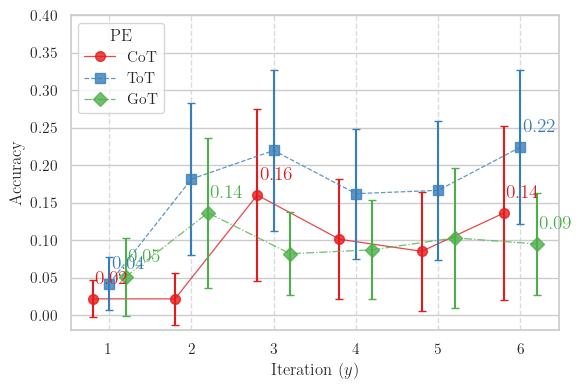

In [226]:

try:
    df['pe'] = df['pe'].replace({
        'cot': 'CoT',
        'tot': 'ToT',
        'got': 'GoT'
    })
except:
    pass
# rename column pe to PE
df = df.rename(columns={'pe': 'PE'})

# Create boxplot to show the distribution at each iteration
# sns.boxplot(
#     data=df, 
#     x='Evaluation/llm_iteration', 
#     y='Evaluation/acc_imp_perc', 
#     hue='PE', 
#     width=0.5, 
#     palette='Set2', 
#     order=iteration_order
# )

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import sem, t


plt.rcParams['text.usetex'] = True
plt.rc('font', family='Times New Roman')  # Windows의 경우

plt.figure(figsize=(6, 4))

# Lineplot to show trends with markers and error bars
palette = sns.color_palette('Set1')
offset = 0.2
markers = ['o', 's', 'D', '^', 'v', 'P', '*']  # Add more markers if needed
line_style = ['-', '--', '-.', ':']  # Add different line styles if needed

confidence_level = 0.95
for idx, (key, group) in enumerate(df.groupby('PE')):
    agg_data = group.groupby('Evaluation/llm_iteration').agg(
        mean=('Evaluation/acc_imp_perc', 'mean'),
        std=('Evaluation/acc_imp_perc', 'std'),
        count=('Evaluation/acc_imp_perc', 'count')
    ).reset_index()
    agg_data['ci'] = t.ppf((1 + confidence_level) / 2, agg_data['count'] - 1) * (agg_data['std'] / np.sqrt(agg_data['count']))
    adjusted_x = agg_data['Evaluation/llm_iteration'] + (5 + idx - len(palette)/2) * offset - 0.3
    
    # Plot error bars with 95% CI
    plt.errorbar(
        adjusted_x, 
        agg_data['mean'], 
        yerr=agg_data['ci'], 
                fmt='none', 

        color=palette[idx], 
        capsize=3, 
        label=None
    )

    # Plot line with markers
    plt.plot(
        adjusted_x, 
        agg_data['mean'],
        color=palette[idx],
        linewidth=0.9,
        label=key,
        linestyle=line_style[idx % len(line_style)],
        alpha=0.8,
        marker=markers[idx % len(markers)],
        markersize=7
    )

    for i, row in agg_data.iterrows():
        if row['Evaluation/llm_iteration'] == iteration_order[0] or row['Evaluation/llm_iteration'] == iteration_order[-1] or row['mean'] == agg_data['mean'].max():
            plt.text(
                adjusted_x[i] + 0.03, 
                row['mean'] + 0.02,  # Slightly above the point
                f"{row['mean']:.2f}", 
                fontsize=14, 
                fontweight='bold', 
                color=palette[idx], 
                ha='left'
            )

# Customize the plot
plt.xlabel('Iteration ($y$)')
plt.ylabel('Accuracy')
# plt.title('Accuracy Improvement vs. LLM Iteration with Boxplot and Trends')
plt.legend(title='PE', loc='upper left')
plt.tight_layout()
plt.ylim(-0.02, 0.4)
plt.grid(axis='y', linestyle='-', alpha=1.0)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig('reasoning_prompt.pdf', dpi=300)
plt.savefig('reasoning_prompt.png', dpi=300)
plt.show()